# Model Evaluation

# 1. Regression 回帰

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

boston = load_boston()
X, y = boston.data, boston.target
df = pd.DataFrame(X)
target = pd.DataFrame(y)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
target.tail()

,0
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train), len(X_test))

354 152


In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mean_absolute_error(y_test, y_pred)

3.679048781096101

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6939090594341992

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

23.8733488153507

In [27]:
import numpy as np
np.sqrt(mean_squared_error(y_test, y_pred))

4.886036104589353

In [10]:
poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [22]:
reg = LinearRegression()
reg.fit(poly_X_train, y_train)
y_pred = reg.predict(poly_X_test)

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

21.04733742412768

In [24]:
mean_squared_error(y_test, y_pred)

777.2467677104546

In [40]:
from sklearn.tree import DecisionTreeRegressor
reg2 = DecisionTreeRegressor(max_depth=3)
reg3 = DecisionTreeRegressor(max_depth=5)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
r2_score(y_test, y_pred)

0.6931342984891116

# 2. Classification 分類

1. Confusion Matrix 混同行列

2. Accuracy 正解率

3. Precision 適合率

4. Recall or Sensitivity 再現率

5. Specificity 特異性

6. F Score F値

7. ROC()

8. AUC ()

9. Multi-class logarithmic loss 他クラス対数損失

In [139]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [140]:
# accuracy
from sklearn.metrics import accuracy_score
clf1 = SVC(kernel = 'linear', C = 0.01)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.9333333333333333

In [143]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.9555555555555556

In [147]:
# presicion
from sklearn.metrics import precision_score
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
precision_score(y_test, y_pred1, average=None)

array([1.        , 0.85714286, 1.        ])

In [145]:
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
precision_score(y_test, y_pred2, average=None)

array([1.        , 0.94444444, 0.94444444])

In [62]:
# recall
from sklearn.metrics import recall_score
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
recall_score(y_test, y_pred1, average=None)

array([1.        , 0.93333333, 0.85714286])

In [63]:
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
recall_score(y_test, y_pred2, average=None)

array([1.        , 1.        , 0.85714286])

In [64]:
# f-score
from sklearn.metrics import f1_score
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
f1_score(y_test, y_pred1, average=None)

array([1.        , 0.90322581, 0.88888889])

In [65]:
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
f1_score(y_test, y_pred2, average=None)

array([1.        , 0.9375    , 0.92307692])

In [75]:
# confusion matrix
from sklearn.metrics import confusion_matrix
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
confusion_matrix(y_test, y_pred2)

array([[16,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 12]])

In [154]:
# ROC curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
#iris = datasets.load_iris()
#X, y = iris.data, iris.target
clf = OneVsRestClassifier(GaussianNB())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [129]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,  y_pred, pos_label=2)
fpr

array([0.        , 0.1       , 0.53333333, 1.        ])

In [130]:
tpr

array([0., 1., 1., 1.])

In [131]:
thresholds

array([3, 2, 1, 0])

In [132]:
auc(fpr, tpr)

0.95

In [127]:
print(fpr, tpr, thresholds)

[0.         0.1        0.53333333 1.        ] [0. 1. 1. 1.] [3 2 1 0]


In [155]:
from sklearn.metrics import log_loss
y_pred = clf.predict_proba(X_test)
log_loss(y_test,  y_pred)

0.09970990582482485

# 3. Clustering クラスタリング

In [213]:
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [238]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [239]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_means = kmeans.predict(X)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

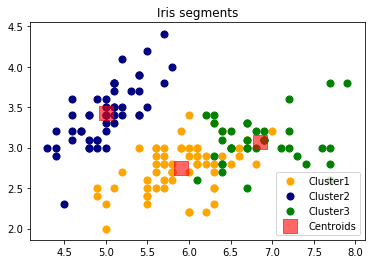

In [224]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='orange',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='navy',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.6, label='Centroids')
plt.title('Iris segments')
plt.legend()
plt.show()

In [228]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_means = kmeans.predict(X)

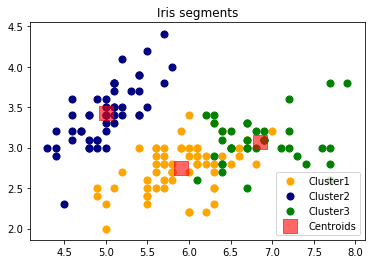

In [230]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='orange',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='navy',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.6, label='Centroids')
plt.title('Iris segments')
plt.legend()
plt.show()

In [231]:
len(X)

150

In [233]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=6)
kmeans = kmeans.partial_fit(X[0:50,:])
kmeans = kmeans.partial_fit(X[50:100,:])
kmeans = kmeans.partial_fit(X[100:150,:])
y_means = kmeans.predict(X)

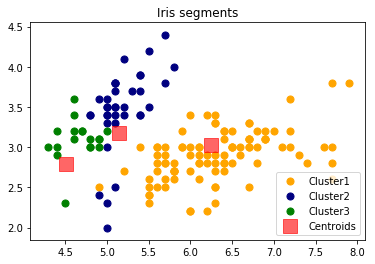

In [234]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='orange',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='navy',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.6, label='Centroids')
plt.title('Iris segments')
plt.legend()
plt.show()

In [241]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
hg = homogeneity_score(y, y_means) 
co = completeness_score(y, y_means)
vm = v_measure_score(y, y_means)
print(hg, co, vm)

0.7514854021988339 0.7649861514489816 0.7581756800057786


# 4. Cross-Validation 交差検定

In [296]:
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target

In [308]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.78378378, 0.86111111, 0.88888889, 0.91428571, 0.85294118])

In [268]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.09)


In [275]:
# CV数変えてみる
scores = cross_val_score(clf, X, y, cv=10)
scores

array([0.89473684, 0.83333333, 0.77777778, 0.88888889, 0.83333333,
       0.83333333, 1.        , 0.94444444, 0.94117647, 1.        ])

In [279]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.14)


In [297]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, SCORERS

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [310]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(clf, X, y, scoring=scoring, cv=5, return_train_score=False)
print(scores)

{'test_recall_macro': array([0.76666667, 0.85238095, 0.90079365, 0.91137566, 0.88095238]), 'test_precision_macro': array([0.79878618, 0.86602564, 0.88888889, 0.91851852, 0.87777778]), 'score_time': array([0.00279498, 0.00261092, 0.00165415, 0.00270295, 0.0016489 ]), 'fit_time': array([0.00161314, 0.00124598, 0.00124192, 0.00087595, 0.00107622])}


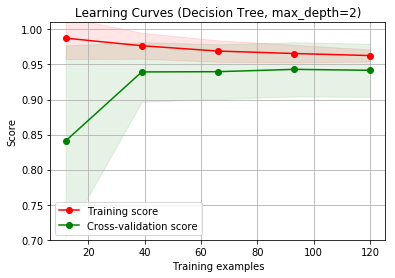

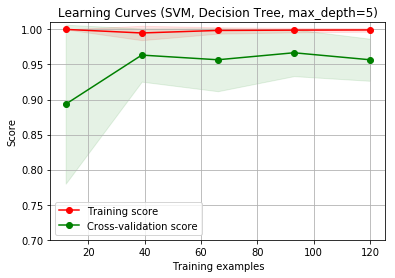

In [323]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC

def plot_learning_curve(clf, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    ax = 2
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Decision Tree, max_depth=2)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(max_depth=2, random_state=0)
plot_learning_curve(clf, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, Decision Tree, max_depth=5)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
plot_learning_curve(clf, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()